In [1]:
#import packages
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 



In [4]:
# Import customer list
u_df=pd.read_csv('./data/Users_sanitized.csv', sep=',', index_col='UserId')
u_df.head()

Unnamed: 0       CreationTimestamp  \
UserId                                                                     
eecc280c-9941-41bc-b26f-d519da794a5d           0  1970-01-01 00:00:00+00   
d9d8a373-29f0-4fe5-8f17-39669083ac48           1  1970-01-01 00:00:00+00   
8f27c773-334a-4f8c-82c2-8cdec215a9bb           2  1970-01-01 00:00:00+00   
aefe87c8-f537-4bdc-954f-6833a047081b           3  1970-01-01 00:00:00+00   
6ad98c4e-18e3-4a6e-ac94-1338cb239c2d           4  1970-01-01 00:00:00+00   

                                     ClaimType  IsOfflineUser  
UserId                                                         
eecc280c-9941-41bc-b26f-d519da794a5d  consumer          False  
d9d8a373-29f0-4fe5-8f17-39669083ac48  consumer           True  
8f27c773-334a-4f8c-82c2-8cdec215a9bb  consumer           True  
aefe87c8-f537-4bdc-954f-6833a047081b  consumer           True  
6ad98c4e-18e3-4a6e-ac94-1338cb239c2d  consumer           True

In [5]:
# Import container list
c_df=pd.read_csv('./data/Containerlist.csv', sep=',', index_col='Id')
c_df.head()

Name  TypeId  \
Id                                                             
00004f6b-e416-4a86-91df-5d177520d3a0  Marinha Grande       1   
00005175-379b-458a-9740-7741814674e4          Dayton       1   
0000bbe4-2051-4c32-850f-220288b868a6           Nahal       6   
0000c7c3-8f3c-4eb2-b586-dcae82555d16      Winfred F.       1   
0000f63c-9747-4c15-871f-f011198c8f88    Billy Wilder       3   

                                                               CreatedById  \
Id                                                                           
00004f6b-e416-4a86-91df-5d177520d3a0  cb73faf3-410a-4e71-83cb-c303efeaeba8   
00005175-379b-458a-9740-7741814674e4  fd3ec806-b763-48a9-992b-09e50c8a274c   
0000bbe4-2051-4c32-850f-220288b868a6                                   NaN   
0000c7c3-8f3c-4eb2-b586-dcae82555d16  cb73faf3-410a-4e71-83cb-c303efeaeba8   
0000f63c-9747-4c15-871f-f011198c8f88  fd3ec806-b763-48a9-992b-09e50c8a274c   

                                     ShortId  
Id                                            
00004f6b-e416-4a86-91df-5d177520d3a0  61CQAR  
00005175-379b-458a-9740-7741814674e4     NaN  
0000bbe4-2051-4c32-850f-220288b868a6     NaN  
0000c7c3-8f3c-4eb2-b586-dcae82555d16  Z9HBTP  
0000f63c-9747-4c15-871f-f011198c8f88     NaN

In [6]:
# Size of df
print(c_df.shape)

c_df.TypeId.unique()

#c_df.Name.unique()


(431444, 4)


array([ 1,  6,  3,  2, 10, 12,  8,  5,  4,  7,  9, 13, 11, 15])

In [7]:
# Import container typs
c_type_df=pd.read_csv('./data/ContainerTypes.csv', sep=',', index_col='Id')
print(c_type_df.shape)
c_type_df.head()

(16, 4)


Name                Description  CategoryId  IsWhiteLabel
Id                                                                  
1   1250ml Bowl            A standard bowl         1.0         False
2    500ml Bowl             A smaller Bowl         1.0         False
3    750ml Bowl              A medium bowl         1.0         False
4      Sushibox            A box for sushi         1.0         False
5           Cup  A reusable cocktail glass         1.0         False

In [8]:
# Import merchants
m_df=pd.read_csv('./data/MerchantInfos.csv', sep=',', index_col='Id')
m_df.head()


MerchantId  \
Id                                                                           
83787f7a-b659-44b6-a8aa-d1ef5b958a65  ed2c2eea-8399-4779-a9ea-dafb77878965   
4cd61f39-ddce-449f-8d1a-ef95c7b25307  cc8b8b51-efd7-4d74-84c8-4721619867df   
fa17e91f-cdfb-4912-81c9-92cd0b87328e  78ecc5a3-0ea0-4820-9fd2-637c95d73782   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c  f9b37c73-3a67-47b3-82cd-cfd1d6fafd6a   
f421a5f6-ba67-4336-afc3-021a04da5005  556becfc-1aac-43e2-87d9-cbc3fab0f4b0   

                                                           Name  Longitude  \
Id                                                                           
83787f7a-b659-44b6-a8aa-d1ef5b958a65   SAP WDF49 - Food Factory   8.642271   
4cd61f39-ddce-449f-8d1a-ef95c7b25307                  Guten Dag  13.413539   
fa17e91f-cdfb-4912-81c9-92cd0b87328e   Gasthaus Brückenschänke    7.771990   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c                      Com A  13.422482   
f421a5f6-ba67-4336-afc3-021a04da5005  BLE - Betriebsgastronomie   7.184823   

                                       Latitude                CreationDate  \
Id                                                                            
83787f7a-b659-44b6-a8aa-d1ef5b958a65  49.292543  2021-06-28 11:56:10.812661   
4cd61f39-ddce-449f-8d1a-ef95c7b25307  52.548254  2020-07-14 19:44:49.101383   
fa17e91f-cdfb-4912-81c9-92cd0b87328e  49.943655  2021-01-20 10:25:12.831661   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c  52.500293  2020-08-26 06:53:57.107271   
f421a5f6-ba67-4336-afc3-021a04da5005  50.672743  2020-10-01 09:33:59.032472   

                                      CategoryId  SellsOfflineCards  \
Id                                                                    
83787f7a-b659-44b6-a8aa-d1ef5b958a65           4              False   
4cd61f39-ddce-449f-8d1a-ef95c7b25307           2              False   
fa17e91f-cdfb-4912-81c9-92cd0b87328e           2              False   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c           2              False   
f421a5f6-ba67-4336-afc3-021a04da5005           4              False   

                                              StreetAddress ZipCode  \
Id                                                                    
83787f7a-b659-44b6-a8aa-d1ef5b958a65  Dietmar-Hopp-Allee 17   69190   
4cd61f39-ddce-449f-8d1a-ef95c7b25307  Schönhauser Allee 120   10437   
fa17e91f-cdfb-4912-81c9-92cd0b87328e         Staatsstraße 4   55442   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c      Oranienstraße 191   10999   
f421a5f6-ba67-4336-afc3-021a04da5005      Deichmanns Aue 29   53179   

                                            City Country  CanGetBowl  \
Id                                                                     
83787f7a-b659-44b6-a8aa-d1ef5b958a65    Walldorf     NaN        True   
4cd61f39-ddce-449f-8d1a-ef95c7b25307      Berlin      DE       False   
fa17e91f-cdfb-4912-81c9-92cd0b87328e  Stromberg      NaN        True   
7c376406-7a5b-4a6c-b22c-e7e02ae0080c      Berlin     NaN        True   
f421a5f6-ba67-4336-afc3-021a04da5005        Bonn     NaN        True   

                                      CanPreorder  IsPublished  ShowInStats  
Id                                                                           
83787f7a-b659-44b6-a8aa-d1ef5b958a65        False         True         True  
4cd61f39-ddce-449f-8d1a-ef95c7b25307         True         True         True  
fa17e91f-cdfb-4912-81c9-92cd0b87328e        False         True         True  
7c376406-7a5b-4a6c-b22c-e7e02ae0080c        False         True         True  
f421a5f6-ba67-4336-afc3-021a04da5005        False        False         True

In [9]:
m_df.groupby(by='MerchantId').size().sort_values()

MerchantId
fff28426-5a3f-4e99-9d50-1787b8e31b54     1
9a48c5a5-5f06-4274-b1e6-4bc25943a8cf     1
9a43fa7f-ba16-4cad-8dea-804a8d8a17a2     1
9a142832-9161-4249-94be-a9e42dc7fa83     1
9a0f7966-2e33-44a1-8c63-fc50f53b75ee     1
                                        ..
f66c97a1-6e67-49a1-889d-fa75aeae356b    14
e97abc44-89c7-4771-952b-b3dab56625c3    15
ed2c2eea-8399-4779-a9ea-dafb77878965    16
3afdaa57-ecc2-4c79-94a3-d10700a299b0    22
6fde0c68-6c47-4183-b725-c5de30f90f02    25
Length: 1720, dtype: int64

In [10]:
import folium

map_osm = folium.Map(location=[50, 5],zoom_start=5)
for ind, row in m_df.iterrows():
    folium.CircleMarker(location=[row["Latitude"], row["Longitude"]],radius=2, popup=ind).add_to(map_osm)
map_osm

### 

In [11]:
# Import regions
r_df=pd.read_csv('./data/Regions.csv', sep=',', index_col='Id')
r_df.head()

Name
Id                                
0                        No Region
1               01_R01_Munich (BY)
2            01_R02_Stuttgart (BW)
3        01_R03_Frankfurt (HE, SL)
4   01_R04_Cologne (NRW_South, RP)

In [12]:
# import transactions
in_df=pd.read_csv('./data/Total Checkins.csv', sep=',')
in_df.head()


#in_df.info()

in_df['OwnerSince']= pd.to_datetime(in_df['OwnerSince'])
in_df['OwnerTill']= pd.to_datetime(in_df['OwnerTill'])

print(in_df.info())


#fi_df =in_df.loc[in_df["OwnerTill"].between('2021-08-1', '2021-08-31')].copy()
#del in_df
#print(fi_df.shape)
#fi_df.head()
in_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659399 entries, 0 to 1659398
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype              
---  ------              --------------    -----              
 0   Unnamed: 0          1659399 non-null  int64              
 1   UserId              1659399 non-null  object             
 2   ExternalPickpackId  1446039 non-null  object             
 3   StoreId             1659399 non-null  object             
 4   StoreName           1659399 non-null  object             
 5   LocationId          1659399 non-null  int64              
 6   TransactionId       1644876 non-null  object             
 7   OwnerSince          1659399 non-null  datetime64[ns, UTC]
 8   OwnerTill           1659399 non-null  datetime64[ns, UTC]
 9   ContainerId         1659399 non-null  object             
 10  ContainerType       1659399 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(2), object(7)
memory usage: 13

Unnamed: 0                                UserId    ExternalPickpackId  \
0           0  3847d24c-7b3c-4908-81cd-11cd9f4b1d37  vytal_bYZ2emJy7RASNN   
1           1  3847d24c-7b3c-4908-81cd-11cd9f4b1d37  vytal_bYZ2emJy7RASNN   
2           2  28421d4c-5213-44e5-a832-49f0b28c0e2a  vytal_q6VAEDli9i6zEK   
3           3  28421d4c-5213-44e5-a832-49f0b28c0e2a  vytal_q6VAEDli9i6zEK   
4           4  1fdf3e5c-7072-4c6e-b7ca-4c2bc53abb98  vytal_Uo1hXokqOiOz2F   

                                StoreId                      StoreName  \
0  26b1bd7b-c684-4cb9-aa76-51cc94b4df70                      Salam Box   
1  26b1bd7b-c684-4cb9-aa76-51cc94b4df70                      Salam Box   
2  afcd3cf4-bf64-4217-b192-6359fac0679a                 Tiki Poke Bowl   
3  afcd3cf4-bf64-4217-b192-6359fac0679a                 Tiki Poke Bowl   
4  825df884-f2cd-4c89-bf27-b63042035435  WDR Arkaden - Betriebskantine   

   LocationId                         TransactionId  \
0     3866638  ee2b5aa8-9aad-447d-a8a2-66258acb18d8   
1     3866637  ee2b5aa8-9aad-447d-a8a2-66258acb18d8   
2     3727671  f5afaa79-a767-4991-9c9d-1a5a4deed74c   
3     3727670  f5afaa79-a767-4991-9c9d-1a5a4deed74c   
4     3885031  f0294ada-73d6-430c-bad3-42a1e5ae66e7   

                        OwnerSince                        OwnerTill  \
0 2021-09-04 11:12:20.545771+00:00 2021-09-06 14:37:49.963400+00:00   
1 2021-09-04 11:12:20.545771+00:00 2021-09-06 14:37:49.963400+00:00   
2 2021-08-25 10:01:09.920476+00:00 2021-09-06 14:36:28.413267+00:00   
3 2021-08-25 10:01:09.920476+00:00 2021-09-06 14:36:28.413267+00:00   
4 2021-09-06 12:41:06.868894+00:00 2021-09-06 14:31:28.996050+00:00   

                            ContainerId     ContainerType  
0  3347515e-eb3f-43ab-a55b-ab019c3b6997       1250ml Bowl  
1  919d2868-f154-46be-93c0-7f548d4416f0       1250ml Bowl  
2  aa5a5efa-4a96-4990-8f4b-f1fb96f0423f  Compartment Bowl  
3  175bde34-9e9b-4c39-8201-4953574688bd       1250ml Bowl  
4  5c9ed900-7098-42d1-a60e-428c97ded2c5        750ml Bowl

In [13]:
in_df['TransactionId'].is_unique


False

In [79]:
in_df.groupby(by='TransactionId').size().sort_values(ascending=False).head(10)

TransactionId
49e518fb-7e24-4c51-843e-4b21dc591dd9    127
5944763c-a9e5-4658-9806-5af868b66d04    111
1e7e5067-113e-4703-9539-8199eed3854c    105
61148594-b72e-42d5-b8cf-739de3e94075     99
a73401d0-aa31-4ec3-89fb-a40a31c48aee     98
018a63a9-a01a-4e33-a73b-ba9b0624f639     93
92ded3d2-f080-4118-936f-4d61d3f6727f     92
98235c45-f2a3-4b10-8b5c-043bf496fdfc     91
2127aadf-ae08-4641-b2ed-8666e1c58c66     91
466f2df0-e126-47bb-a2b0-8be19499f6ef     91
dtype: int64

In [84]:
in_df.groupby(by='TransactionId')['UserId'].nunique().sort_values(ascending=False)

TransactionId
fffffc43-9037-4f10-be07-f0c44c69e75e    1
558a348d-d8a7-4088-b990-f3e04f391996    1
558bab0b-2dfe-402d-a26f-11ed0b918d0d    1
558ba462-961f-420f-a1e5-af14e681b963    1
558b9d0f-193c-4196-a923-abb600e946f4    1
                                       ..
aaaf4d5a-a5f8-4cd7-9dfd-4d0c6cc3c943    1
aaaf2ad2-e039-4c9f-a5a5-d89d5fa62a04    1
aaaf1643-dde0-447f-be46-58e2b4397383    1
aaaf05be-d199-4baa-80f7-7aa732304c52    1
00001fcf-6a41-478c-8528-bfdbb8bcc2cf    1
Name: UserId, Length: 1063448, dtype: int64

In [17]:
out_df=pd.read_csv('./data/Total Checkout.csv', sep=',')
out_df['OwnerSince']= pd.to_datetime(out_df['OwnerSince'])
out_df['OwnerTill']= pd.to_datetime(out_df['OwnerTill'])

out_df.head(2)


/Users/kultiginbozdemir/opt/anaconda3/envs/CO2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (6,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Unnamed: 0                                UserId    ExternalPickpackId  \
0           0  db70348b-76ae-4bff-b3ef-c1c727cc3be7  vytal_yjCP6j0bbUVAu0   
1           1  66c1e632-a6d1-4203-bc6a-2b4c8e669e92  vytal_OwGu7ZOXba3jbu   
2           2  66c1e632-a6d1-4203-bc6a-2b4c8e669e92  vytal_OwGu7ZOXba3jbu   
3           3  c525dce1-af31-4628-b4e9-c73901bf12d6  vytal_dpJU8pmvYzdV5e   
4           4  c525dce1-af31-4628-b4e9-c73901bf12d6  vytal_dpJU8pmvYzdV5e   

                                StoreId                       StoreName  \
0  e6e6d4e5-56dd-4361-8ebd-ebdd865f41ea          Mashery Hummus Kitchen   
1  e78d649c-7ced-4e07-95d0-8a25c58e1bc9  Krua Thai (Belgisches Viertel)   
2  e78d649c-7ced-4e07-95d0-8a25c58e1bc9  Krua Thai (Belgisches Viertel)   
3  c0a21089-3449-4744-b080-a8c7055718e2               Saigonese Kitchen   
4  c0a21089-3449-4744-b080-a8c7055718e2               Saigonese Kitchen   

   LocationId TransactionId                       OwnerSince  \
0       63672           NaN 2020-09-01 18:25:20.296746+00:00   
1       63666           NaN 2020-09-01 18:14:25.942667+00:00   
2       63664           NaN 2020-09-01 18:14:25.285038+00:00   
3       63657           NaN 2020-09-01 18:13:51.972676+00:00   
4       63659           NaN 2020-09-01 18:13:51.972676+00:00   

                         OwnerTill                           ContainerId  \
0 2020-09-01 18:25:20.296746+00:00  4a9a935d-2260-4cfb-9bad-9751e48291a0   
1 2020-09-01 18:14:25.942667+00:00  7f161610-c775-406f-a67c-95d322b463f6   
2 2020-09-01 18:14:25.285038+00:00  68ea4bb3-0465-4209-a4cd-e6c03b394f7f   
3 2020-09-01 18:13:51.972676+00:00  eff44578-fe90-4045-ad49-6efc42c72a6e   
4 2020-09-01 18:13:51.972676+00:00  fa898324-f79e-42b2-86ef-4323d74e80c6   

  DeliveryTokenId ContainerType  
0             NaN   1250ml Bowl  
1             NaN   1250ml Bowl  
2             NaN    500ml Bowl  
3             NaN    750ml Bowl  
4             NaN    750ml Bowl

In [82]:
out_df.groupby(by='TransactionId')['UserId'].nunique().sort_values(ascending=False)

TransactionId
092fbc3d-2267-4325-a509-0b495fb38b9c    182
6de4ed83-93cc-48e7-81e0-d2279702fef9    117
0fc2bef3-0a8f-4484-9a46-9a8aa519c119    114
33aedccc-2a38-45bb-b71e-ad420a10409c    114
88f30044-d658-4a8a-b6b5-5274e8064d48    109
                                       ... 
c5a69fbc-69b2-4faa-b860-33c7dc18235f      1
6bbe08b7-992e-4046-b56a-a1f8795813a2      1
6bbe1da3-70fc-4be5-839c-b41406b015fb      1
c5a64062-cedd-4ada-98ff-18bfe0a73b2a      1
ffffdd56-057d-4b81-b43e-cf9cf1d8fdb8      1
Name: UserId, Length: 542268, dtype: int64

In [72]:
out_df.groupby(by='TransactionId').size().sort_values(ascending=False).head(9000).tail(3)

TransactionId
60f6ca1f-8070-4c04-ba46-a36fd03873d5    16
60dc616f-536b-47f9-8527-105e59e16155    16
01c67a73-e52b-400f-9dcc-0059799ddfe7    16
dtype: int64

In [73]:
out_df[out_df['TransactionId']=='01c67a73-e52b-400f-9dcc-0059799ddfe7']

Unnamed: 0                                UserId  \
319009       319009  54b0cd36-eb71-4dd4-8cb2-89fc9f28031f   
334678       334678  2e73982b-a048-489e-aadc-8527725dd2f3   
359987       359987  240a2ec9-f5ae-4b6f-a5a4-123a73c1062b   
360099       360099  0c053d30-90ae-48f0-9c31-60f8837a9e9f   
361066       361066  ee0331a1-c9d4-4771-9fb8-7afbd79b8616   
361067       361067  ee0331a1-c9d4-4771-9fb8-7afbd79b8616   
368397       368397  244400de-c5bc-41b1-90f8-e1339866f66c   
368458       368458  588e85f2-53f3-44d2-99fc-ff8c2e70d888   
370607       370607  7421eedd-e918-4bb6-af52-22ecd57fc081   
379653       379653  e42ffa50-b02d-4b6f-b0c9-eba4313e5f9f   
379654       379654  e42ffa50-b02d-4b6f-b0c9-eba4313e5f9f   
401691       401691  6e924989-650b-4e32-b2dc-ba8cdda9c5f4   
415714       415714  fbc705a5-74bd-4877-bd56-f848c18fcb39   
415716       415716  fbc705a5-74bd-4877-bd56-f848c18fcb39   
1155777     1155777  123bba2e-8487-421d-b96a-609d3692c890   
1156047     1156047  54b0cd36-eb71-4dd4-8cb2-89fc9f28031f   

           ExternalPickpackId                               StoreId  \
319009   vytal_lNQs7SfBmx5t92  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
334678   vytal_zKcUsAA74YPBYM  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
359987   vytal_rrJdR5h2Af3eKj  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
360099   vytal_WG4B2aYj3HJFeH  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
361066   vytal_7rlawQFeM7tVoJ  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
361067   vytal_7rlawQFeM7tVoJ  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
368397   vytal_Y0sCqIubq52pag  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
368458   vytal_xa8c3rFszSLefn  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
370607   vytal_mRrwaNp8GfJTG8  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
379653   vytal_BXAKI0XYFWEFYV  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
379654   vytal_BXAKI0XYFWEFYV  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
401691   vytal_E1o32JxTq3Ma5X  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
415714   vytal_WtG8tutcPxZ8JS  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
415716   vytal_WtG8tutcPxZ8JS  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
1155777  vytal_gEDy8ov62Habxv  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
1156047  vytal_lNQs7SfBmx5t92  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   

                 StoreName  LocationId                         TransactionId  \
319009   Jaegers FeineKost     1626721  01c67a73-e52b-400f-9dcc-0059799ddfe7   
334678   Jaegers FeineKost     1626716  01c67a73-e52b-400f-9dcc-0059799ddfe7   
359987   Jaegers FeineKost     1626722  01c67a73-e52b-400f-9dcc-0059799ddfe7   
360099   Jaegers FeineKost     1626713  01c67a73-e52b-400f-9dcc-0059799ddfe7   
361066   Jaegers FeineKost     1626707  01c67a73-e52b-400f-9dcc-0059799ddfe7   
361067   Jaegers FeineKost     1626719  01c67a73-e52b-400f-9dcc-0059799ddfe7   
368397   Jaegers FeineKost     1626715  01c67a73-e52b-400f-9dcc-0059799ddfe7   
368458   Jaegers FeineKost     1626720  01c67a73-e52b-400f-9dcc-0059799ddfe7   
370607   Jaegers FeineKost     1626708  01c67a73-e52b-400f-9dcc-0059799ddfe7   
379653   Jaegers FeineKost     1626709  01c67a73-e52b-400f-9dcc-0059799ddfe7   
379654   Jaegers FeineKost     1626712  01c67a73-e52b-400f-9dcc-0059799ddfe7   
401691   Jaegers FeineKost     1626710  01c67a73-e52b-400f-9dcc-0059799ddfe7   
415714   Jaegers FeineKost     1626724  01c67a73-e52b-400f-9dcc-0059799ddfe7   
415716   Jaegers FeineKost     1626717  01c67a73-e52b-400f-9dcc-0059799ddfe7   
1155777  Jaegers FeineKost     1626718  01c67a73-e52b-400f-9dcc-0059799ddfe7   
1156047  Jaegers FeineKost     1626711  01c67a73-e52b-400f-9dcc-0059799ddfe7   

                              OwnerSince                        OwnerTill  \
319009  2021-04-09 11:48:49.452363+00:00 2021-04-28 17:27:01.374037+00:00   
334678  2021-04-09 11:48:49.452363+00:00 2021-04-27 10:35:25.529667+00:00   
359987  2021-04-09 11:48:49.452363+00:00 2021-04-23 11:44:39.300742+00:00   
360099  2021-04-09 11:48:49.452363+00:00 2021-04-23 11:37:54.778965+00:00   
361066  2021-04-0

In [75]:
import datetime as dt


date_time_str = '2021-05-19 17:20:15'
date_time_obj = dt.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')


print ("The type of the date is now",  type(date_time_obj))
print ("The date is", date_time_obj)
print(date_time_obj.date())
date_=in_df['OwnerSince'].dt.date==date_time_obj.date()
container=in_df['ContainerId']=='2dc69c25-a17a-4fe9-8967-56e74c027468'
transaction_id=in_df[date_ & container]['TransactionId']
print(transaction_id)

The type of the date is now <class 'datetime.datetime'>
The date is 2021-05-19 17:20:15
2021-05-19
586015    4222158d-02ea-4891-8961-cd5d27135376
Name: TransactionId, dtype: object


In [77]:
transaction=in_df['TransactionId']=='4222158d-02ea-4891-8961-cd5d27135376'
in_df[transaction ]

Unnamed: 0                                UserId  \
586014      586014  54b0cd36-eb71-4dd4-8cb2-89fc9f28031f   
586015      586015  54b0cd36-eb71-4dd4-8cb2-89fc9f28031f   
647881      647881  54b0cd36-eb71-4dd4-8cb2-89fc9f28031f   

          ExternalPickpackId                               StoreId  \
586014  vytal_lNQs7SfBmx5t92  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
586015  vytal_lNQs7SfBmx5t92  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   
647881  vytal_lNQs7SfBmx5t92  ee26f9ab-62fb-4af4-bdf9-8681d6109b49   

                StoreName  LocationId                         TransactionId  \
586014  Jaegers FeineKost     2346675  4222158d-02ea-4891-8961-cd5d27135376   
586015  Jaegers FeineKost     2346674  4222158d-02ea-4891-8961-cd5d27135376   
647881  Jaegers FeineKost     2346676  4222158d-02ea-4891-8961-cd5d27135376   

                             OwnerSince                        OwnerTill  \
586014 2021-05-19 17:20:15.690137+00:00 2021-06-02 17:22:11.860202+00:00   
586015 2021-05-19 17:20:15.690137+00:00 2021-06-02 17:22:11.860202+00:00   
647881 2021-05-19 17:20:15.690137+00:00 2021-05-26 16:40:52.684829+00:00   

                                 ContainerId ContainerType  
586014  aab5c654-358e-48f2-bad4-36c9369ea462   1250ml Bowl  
586015  2dc69c25-a17a-4fe9-8967-56e74c027468   1250ml Bowl  
647881  919e58bb-fdae-4f22-9c64-6cd4d0eb8886   1250ml Bowl

In [48]:
#Lets follow the journey of a container...
in_df[in_df['ContainerId']=='69d293fa-f7ce-4039-9c52-52cf03ba7ce6'].sort_values(by='OwnerSince')

Unnamed: 0                                UserId  \
1450967     1450967  05c05bde-7e0b-4cd4-a4e0-63d8c020dccf   
1400781     1400781  83074cff-0ca2-4e19-a625-2338a420ea88   
1351810     1351810  95e79468-c0dc-41bf-85e6-73d3ac96532b   
1287338     1287338  2638dc36-b123-44a6-9db6-00f1f5b43dfb   
1265933     1265933  83074cff-0ca2-4e19-a625-2338a420ea88   
728023       728023  349ebe53-3897-4d1d-b511-179c9145ce7e   
574123       574123  e4fbddb3-305b-43f2-b4f0-1dfe6226e591   
451438       451438  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
414719       414719  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
383292       383292  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
323138       323138  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
244792       244792  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
168046       168046  11023101-4ad5-456d-a308-da4e56b84832   
65954         65954  1c0da369-599f-49ee-bd80-27b100f73754   
8817           8817  edd29b6b-1a3c-4c68-bce1-dd5244985e25   

           ExternalPickpackId                               StoreId  \
1450967  vytal_eu8NIO6agLuxOK  6d1fd649-f721-4ec4-a279-ac1176f771c9   
1400781  vytal_nLFwx3UJxIUNyi  6d1fd649-f721-4ec4-a279-ac1176f771c9   
1351810  vytal_bVxGec67XtgSFM  6d1fd649-f721-4ec4-a279-ac1176f771c9   
1287338  vytal_Rp5xgJuWc1ylkA  6d1fd649-f721-4ec4-a279-ac1176f771c9   
1265933  vytal_nLFwx3UJxIUNyi  6d1fd649-f721-4ec4-a279-ac1176f771c9   
728023   vytal_X9zCXFKSznzFPk  be176976-3230-4ec2-9985-e5246a76d746   
574123   vytal_RftiJCZurkwIWP  be176976-3230-4ec2-9985-e5246a76d746   
451438   vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
414719   vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
383292   vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
323138   vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
244792   vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
168046   vytal_jSRAmNPxpEpTR4  be176976-3230-4ec2-9985-e5246a76d746   
65954    vytal_m4MuhLYWUkYrje  be176976-3230-4ec2-9985-e5246a76d746   
8817     vytal_s3a5Ik2sQk0Iw8  22502b98-d545-4554-a834-43f007b86171   

                        StoreName  LocationId  \
1450967                 Die Kurve     1161191   
1400781                 Die Kurve     1287626   
1351810                 Die Kurve     1466353   
1287338                 Die Kurve     1527516   
1265933                 Die Kurve     1613129   
728023   Greentrees Lorettostraße     2260863   
574123   Greentrees Lorettostraße     2519819   
451438   Greentrees Lorettostraße     2834457   
414719   Greentrees Lorettostraße     2888128   
383292   Greentrees Lorettostraße     2967980   
323138   Greentrees Lorettostraße     3038054   
244792   Greentrees Lorettostraße     3170451   
168046   Greentrees Lorettostraße     3428163   
65954    Greentrees Lorettostraße     3688632   
8817      Aloha POKE in Unterbilk     3851516   

                                TransactionId  \
1450967  ab2203d2-094d-4fb9-9699-4f142efb5a53   
1400781  fd96eaab-d425-491f-a233-8fa2e076bb4c   
1351810  58568c79-82a2-411f-83ad-42bbacb997c0   
1287338  b7ecd59f-6263-4a92-861f-b6bb6bb7a916   
1265933  8960b52c-89d3-43ce-b8dc-e83becd3d0af   
728023   26cb2e9a-379f-43b6-afb4-7ed2f3adbd4b   
574123   8869ee7e-f360-44b5-a992-478a0183b181   
451438   b7eb06e1-b96c-4348-99a2-2dbdf2dba550   
414719   1f91b6a0-487e-4b63-84f6-9ea7a0c48e91   
383292   b90cd0e9-a66d-4085-99e2-464e30ee00e1   
323138   e7834341-d1cd-4442-b6aa-3fb618f1365b   
244792   dd7ac1d7-d862-48e7-af07-e6a62c1f2440   
168046   a4584e9e-0c19-4e1d-8d9b-1c8227aa8b8e   
65954    c3062402-c2cb-47c3-a6a0-293e904c7d47   
8817     4c8ea182-6550-41fa-aa70-58dd91196576   

                              OwnerSince                        OwnerTill  \
1450967 2021-03-04 18:18:38.991559+00:00 2021-03-11 19:01:40.497716+00:00   
1400781 2021-03-15 17:12:53.265828+00:00 2021-03-19 17:18:36.642248+00:00   
1351810 2021-03-26 16:54:26.128634+00:00 2021-03-27 16:35:45.233048+00:00   
1287338 2021-03-3

In [47]:
out_df[out_df['ContainerId']=='69d293fa-f7ce-4039-9c52-52cf03ba7ce6'].sort_values(by='OwnerSince')

Unnamed: 0                                UserId  \
688919       688919  05c05bde-7e0b-4cd4-a4e0-63d8c020dccf   
628777       628777  83074cff-0ca2-4e19-a625-2338a420ea88   
548565       548565  95e79468-c0dc-41bf-85e6-73d3ac96532b   
520250       520250  2638dc36-b123-44a6-9db6-00f1f5b43dfb   
479794       479794  83074cff-0ca2-4e19-a625-2338a420ea88   
1196573     1196573  349ebe53-3897-4d1d-b511-179c9145ce7e   
1078200     1078200  e4fbddb3-305b-43f2-b4f0-1dfe6226e591   
937139       937139  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
911550       911550  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
875416       875416  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
1695154     1695154  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
1634839     1634839  9ce5c0ad-863a-4f00-9047-61e0eb05e890   
1520475     1520475  11023101-4ad5-456d-a308-da4e56b84832   
1400915     1400915  1c0da369-599f-49ee-bd80-27b100f73754   
1325437     1325437  edd29b6b-1a3c-4c68-bce1-dd5244985e25   

           ExternalPickpackId                               StoreId  \
688919   vytal_eu8NIO6agLuxOK  6d1fd649-f721-4ec4-a279-ac1176f771c9   
628777   vytal_nLFwx3UJxIUNyi  6d1fd649-f721-4ec4-a279-ac1176f771c9   
548565   vytal_bVxGec67XtgSFM  6d1fd649-f721-4ec4-a279-ac1176f771c9   
520250   vytal_Rp5xgJuWc1ylkA  6d1fd649-f721-4ec4-a279-ac1176f771c9   
479794   vytal_nLFwx3UJxIUNyi  6d1fd649-f721-4ec4-a279-ac1176f771c9   
1196573  vytal_X9zCXFKSznzFPk  6d1fd649-f721-4ec4-a279-ac1176f771c9   
1078200  vytal_RftiJCZurkwIWP  be176976-3230-4ec2-9985-e5246a76d746   
937139   vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
911550   vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
875416   vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
1695154  vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
1634839  vytal_6YPPWLaj31dlmC  be176976-3230-4ec2-9985-e5246a76d746   
1520475  vytal_jSRAmNPxpEpTR4  be176976-3230-4ec2-9985-e5246a76d746   
1400915  vytal_m4MuhLYWUkYrje  be176976-3230-4ec2-9985-e5246a76d746   
1325437  vytal_s3a5Ik2sQk0Iw8  be176976-3230-4ec2-9985-e5246a76d746   

                        StoreName  LocationId  \
688919                  Die Kurve     1160546   
628777                  Die Kurve     1248946   
548565                  Die Kurve     1360265   
520250                  Die Kurve     1471062   
479794                  Die Kurve     1611232   
1196573                 Die Kurve     1661250   
1078200  Greentrees Lorettostraße     2287819   
937139   Greentrees Lorettostraße     2621007   
911550   Greentrees Lorettostraße     2888106   
875416   Greentrees Lorettostraße     2967950   
1695154  Greentrees Lorettostraße     3038051   
1634839  Greentrees Lorettostraße     3170445   
1520475  Greentrees Lorettostraße     3341219   
1400915  Greentrees Lorettostraße     3511221   
1325437  Greentrees Lorettostraße     3741703   

                                TransactionId  \
688919   679e2717-6ffb-4c41-88e4-82d68071621d   
628777   1b423a3e-4281-4290-a603-a9196c66b535   
548565   c285d3f0-5a53-45f5-9236-809bc2e383db   
520250   9c357613-e9d8-42a1-961d-249d3e0c86f9   
479794   4555101e-e95b-4d2f-aa43-0426d2e18490   
1196573  82e43ff0-2ce6-43a6-ae63-021d199ba144   
1078200  973afecf-806e-4092-bac6-2719e4a8ae99   
937139   d326bf27-f137-4029-bc5a-f4c46a15fc1b   
911550   3f0b8efb-2521-4c36-b9bf-440615511cfd   
875416   fd408ed6-12b6-49fb-a28a-daef72e5a909   
1695154  eae06d02-a188-4243-a310-9c98912b61ea   
1634839  2519fbe8-0fcf-45a2-8b66-f2b479478d55   
1520475  8fccb2c6-1e18-42df-be4b-55adbafd1290   
1400915  ebb5f7b7-3192-4cf7-ade1-dc0a1c3afb75   
1325437  2fa7dcc5-884b-44ac-a30d-f987508f0700   

                              OwnerSince                        OwnerTill  \
688919  2021-03-04 17:26:02.423452+00:00 2021-03-04 18:18:38.991559+00:00   
628777  2021-03-11 19:01:40.497716+00:00 2021-03-15 17:12:53.265828+00:00   
548565  2021-03-19 17:18:36.642248+00:00 2021-03-26 16:54:26.128634+00:00   
520250  2021-03-2

In [98]:

m_df['in']=in_df.groupby(by='StoreId').size()
m_df['out']=out_df.groupby(by='StoreId').size()
m_df['delta']=in_df.groupby(by='StoreId').size()-out_df.groupby(by='StoreId').size()

In [106]:
m_df.sort_values(by='delta', ascending=False).head()

MerchantId  \
Id                                                                           
09634871-b052-414b-9153-a54511ff7406  9109a384-adae-48ac-a68e-1f6949db1fe3   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6  278a9a87-c4ff-464e-a8b2-e83c63aaffe2   
43d2ffe7-f688-4e89-ab37-6fd5733996a1  025ac27d-ed4b-4de8-914b-4af142dc5941   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b  cdb00ca5-3f60-49aa-be73-9527adff5b71   
87e40f46-963d-4097-b3ec-25b7d7a55a10  025ac27d-ed4b-4de8-914b-4af142dc5941   

                                                                   Name  \
Id                                                                        
09634871-b052-414b-9153-a54511ff7406                           Da Baffo   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6  Continental - Betriebsgastronomie   
43d2ffe7-f688-4e89-ab37-6fd5733996a1    REWE Hohenzollernring Automaten   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b                 Café im Wasserturm   
87e40f46-963d-4097-b3ec-25b7d7a55a10         REWE Salierring 47-53 Köln   

                                      Longitude   Latitude  \
Id                                                           
09634871-b052-414b-9153-a54511ff7406  11.604073  48.146532   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6  12.140944  49.006083   
43d2ffe7-f688-4e89-ab37-6fd5733996a1   6.939905  50.941393   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b  13.355663  52.481539   
87e40f46-963d-4097-b3ec-25b7d7a55a10   6.942565  50.928090   

                                                    CreationDate  CategoryId  \
Id                                                                             
09634871-b052-414b-9153-a54511ff7406  2020-10-30 10:01:03.921847           2   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6  2020-12-09 17:09:22.268836           4   
43d2ffe7-f688-4e89-ab37-6fd5733996a1  2020-11-14 12:50:25.517719           5   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b  2020-05-11 15:41:47.985373           2   
87e40f46-963d-4097-b3ec-25b7d7a55a10  2020-09-10 12:49:52.403804           5   

                                      SellsOfflineCards  \
Id                                                        
09634871-b052-414b-9153-a54511ff7406              False   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6              False   
43d2ffe7-f688-4e89-ab37-6fd5733996a1              False   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b              False   
87e40f46-963d-4097-b3ec-25b7d7a55a10              False   

                                              StreetAddress ZipCode  \
Id                                                                    
09634871-b052-414b-9153-a54511ff7406  Ismaninger Straße 108   81675   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6       Siemensstraße 12   93055   
43d2ffe7-f688-4e89-ab37-6fd5733996a1    Hohenzollernring 79   50672   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b         EUREF-Campus 3   10829   
87e40f46-963d-4097-b3ec-25b7d7a55a10       Salierring 47-53   50677   

                                            City Country  CanGetBowl  \
Id                                                                     
09634871-b052-414b-9153-a54511ff7406     München      DE        True   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6  Regensburg     NaN        True   
43d2ffe7-f688-4e89-ab37-6fd5733996a1        Köln     NaN        True   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b      Berlin     NaN        True   
87e40f46-963d-4097-b3ec-25b7d7a55a10        Köln     NaN        True   

                                      CanPreorder  IsPublished  ShowInStats  \
Id                                                                            
09634871-b052-414b-9153-a54511ff7406         True         True         True   
be12e2c6-b2ea-4065-a0dd-267bc9d8d0f6        False         True         True   
43d2ffe7-f688-4e89-ab37-6fd5733996a1        False        False         True   
7aaac3e7-174a-49c8-a0d6-427fb1187e0b        False         True         True   
87e40f46-963d-4097-b3ec-25b7d7a55a10        False         True         True   

                        

In [102]:
map_osm = folium.Map(location=[50, 5],zoom_start=5)
for ind, row in m_df.iterrows():
    if row['delta']<0: color='red'
    else: color='green'
    folium.CircleMarker(location=[row["Latitude"], row["Longitude"]],radius=2, popup=ind, color=color).add_to(map_osm)
map_osm

<AxesSubplot:>

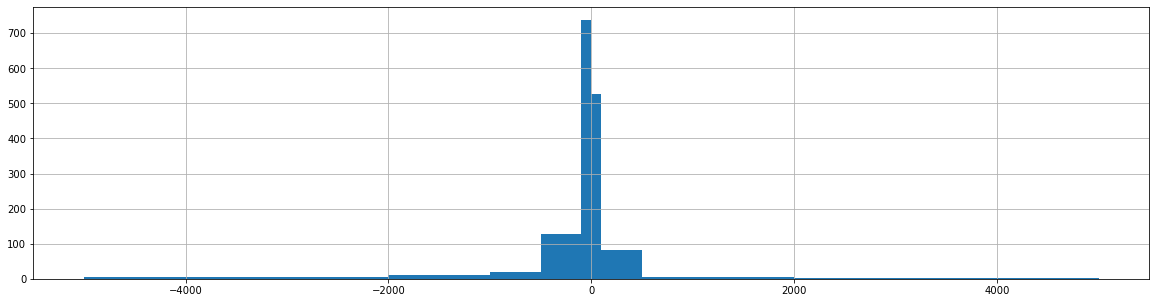

In [124]:
m_df['delta'].hist(bins=[-5000,-2000,-1000,-500,-100,0,100,500,1000,2000,5000], figsize=(20,5))